In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy as sp
import torch

In [14]:
# Specify the file path
file_path_vid = "all_valididx.pickle"
file_path_tid = "all_trainidx.pickle"
file_path_pred = "pred.pickle"
file_path_tEtar = "trueE_target.pickle"

In [10]:
# Open the file and load its content
with open(file_path_pred, "rb") as file:  # "rb" mode is for reading in binary
    data_pred = pickle.load(file)

In [11]:
type(data_pred)

list

In [12]:
len(data_pred)

1042342

In [88]:
# data_pred

In [15]:
# Open the file and load its content
with open(file_path_tEtar, "rb") as file:  # "rb" mode is for reading in binary
    data_true = pickle.load(file)

In [18]:
type(data_true)

awkward.highlevel.Array

In [26]:
data_true_list = data_true.to_list()

In [27]:
type(data_true_list)

list

In [31]:
len(data_true_list)

1042342

In [89]:
# data_true_list

In [35]:
# Original list with extra brackets
nested_list = data_true_list

# Flatten the list to remove extra brackets
simple_list = [x[0] for x in nested_list]

Data_true_list = simple_list



In [87]:
# Data_true_list

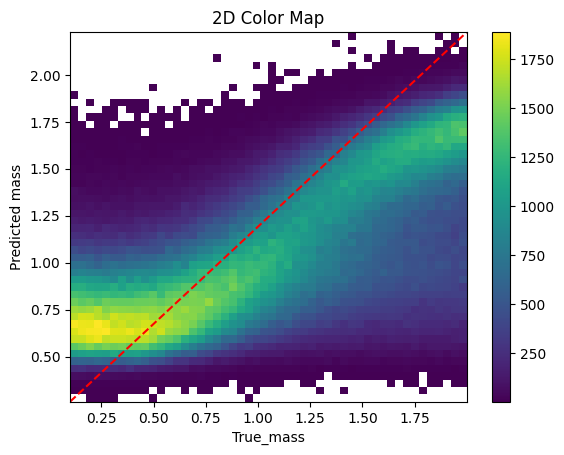

In [47]:
# Reshape into a 2D array (just for demonstration)
data = np.array([data_pred, Data_true_list])

x = np.linspace (min(Data_true_list), max(Data_true_list), 100)
y = np.linspace (min(data_pred), max(data_pred), 100)

# Plot the heatmap
plt.hist2d(data[1],data[0],bins= [50,50],cmin=1)
plt.colorbar()  # Show color scale
plt.plot(x,y, c='r', ls='--')
plt.title('2D Color Map')
plt.xlabel('True_mass')
plt.ylabel('Predicted mass')
plt.show()


In [48]:
# Open the file and load its content
with open(file_path_vid, "rb") as file:  # "rb" mode is for reading in binary
    data_vid = pickle.load(file)

In [49]:
# Open the file and load its content
with open(file_path_tid, "rb") as file:  # "rb" mode is for reading in binary
    data_tid = pickle.load(file)

In [63]:
data_vid[0:10]

array([ 2,  5, 15, 26, 34, 36, 37, 40, 41, 42])

In [64]:
data_tid[0:10]

array([ 374886,  439570,  510061,  538829,  385083, 1016843,  335942,
        484920,  942316, 1032720])

In [71]:
data_vid_sort = np.sort(data_vid)

In [72]:
print(data_vid_sort)

[      2       5      15 ... 1042336 1042338 1042339]


In [73]:
data_tid_sort = np.sort (data_tid)

In [74]:
data_tid_sort

array([      0,       1,       3, ..., 1042337, 1042340, 1042341])

In [76]:
data_pred_arr = np.array(data_pred)
Data_true_arr = np.array(Data_true_list)

In [78]:
train_data_pred = data_pred_arr[data_tid_sort]
valid_data_pred = data_pred_arr[data_vid_sort]
train_data_true =Data_true_arr[data_tid_sort]
valid_data_true = Data_true_arr[data_vid_sort]

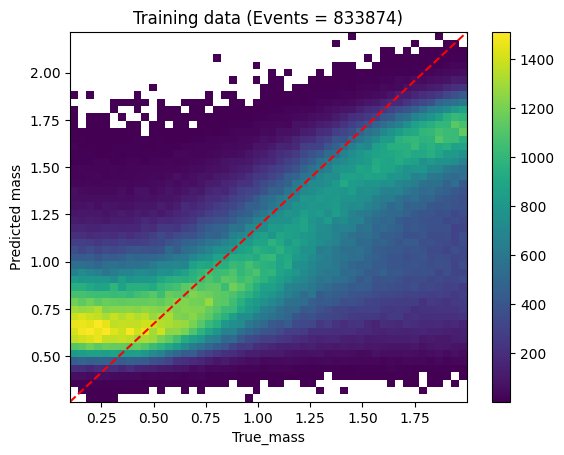

In [85]:
# Reshape into a 2D array (just for demonstration)
# data = np.array([data_pred, Data_true_list])

num_Events_train = len(train_data_true)

x = np.linspace (min(train_data_true), max(train_data_true), 100)
y = np.linspace (min(train_data_pred), max(train_data_pred), 100)

# Plot the heatmap
plt.hist2d(train_data_true,train_data_pred,bins= [50,50],cmin=1)
plt.colorbar()  # Show color scale
plt.plot(x,y, c='r', ls='--')
plt.title(f'Training data (Events = {num_Events_train})')
plt.xlabel('True_mass')
plt.ylabel('Predicted mass')
plt.show()

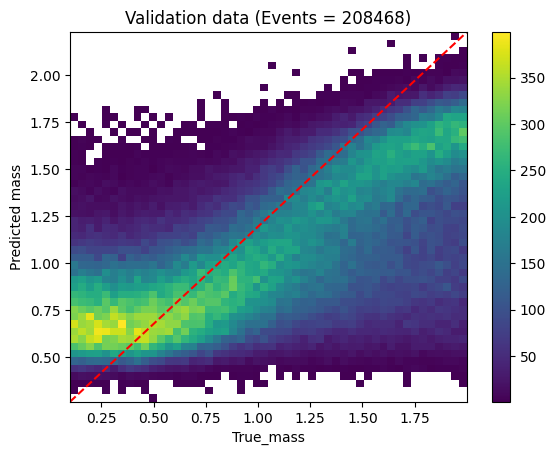

In [86]:
# Reshape into a 2D array (just for demonstration)
# data = np.array([data_pred, Data_true_list])

num_Events_valid = len(valid_data_true)

x = np.linspace (min(valid_data_true), max(valid_data_true), 100)
y = np.linspace (min(valid_data_pred), max(valid_data_pred), 100)

# Plot the heatmap
plt.hist2d(valid_data_true,valid_data_pred,bins= [50,50],cmin=1)
plt.colorbar()  # Show color scale
plt.plot(x,y, c='r', ls='--')
plt.title(f'Validation data (Events = {num_Events_valid})')
plt.xlabel('True_mass')
plt.ylabel('Predicted mass')
plt.show()